In [5]:
import pandas as pd
from pickle import dump
from sklearn.feature_selection import f_classif, SelectKBest
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
from sklearn.metrics import accuracy_score

In [6]:
y_train = pd.read_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_y_train.csv")
y_test = pd.read_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_y_test.csv")
X_train = pd.read_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_X_train.csv")
X_test = pd.read_csv("/workspaces/EDA_5_alfonso/data/processed/diabetes_X_test.csv")

In [7]:
accs = []
percents = [1, 0.8, 0.7, 0.6, 0.5]
for p in percents:
    selection_model = SelectKBest(f_classif, k = int(len(X_train.columns) * p))
    selection_model.fit(X_train, y_train)

    ix = selection_model.get_support()
    X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
    X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

    dump(selection_model, open(f"/workspaces/EDA_5_alfonso/models/selection_model{p}.pk", "wb"))

    model = DecisionTreeClassifier(random_state = 24)
    model.fit(X_train_sel, y_train)
    y_pred = model.predict(X_test_sel)
    acc = accuracy_score(y_test, y_pred)
    accs.append(acc)

best_acc = accs.index(max(accs)) # Ha ganado p = 0.6
print(percents[best_acc])
print(accs[best_acc])

0.6
0.7532467532467533


/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

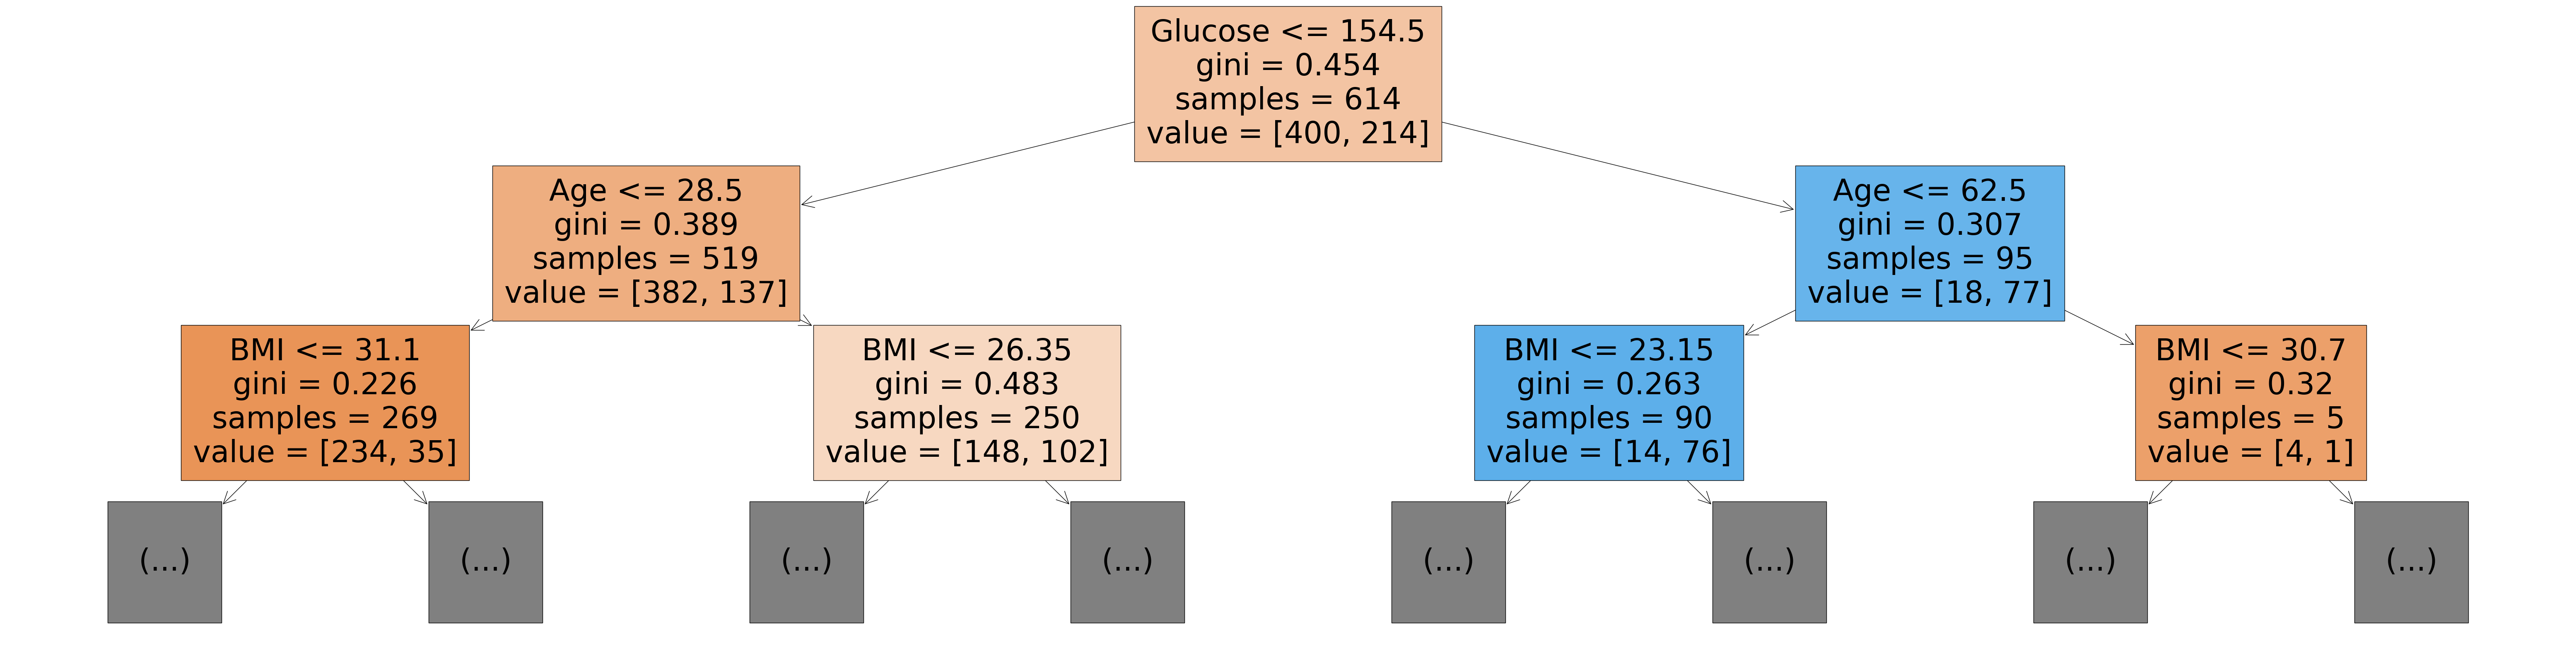

In [8]:
plt.figure(figsize =(80,20))

plot_tree(model, feature_names=X_train_sel.columns, max_depth=2, filled=True);
